<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 3
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

14:24:08 INFO << load arm CSV.
14:24:08 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 4)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 4)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [01:26<00:00, 28.73s/it]


14:41:15 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
14:41:15 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


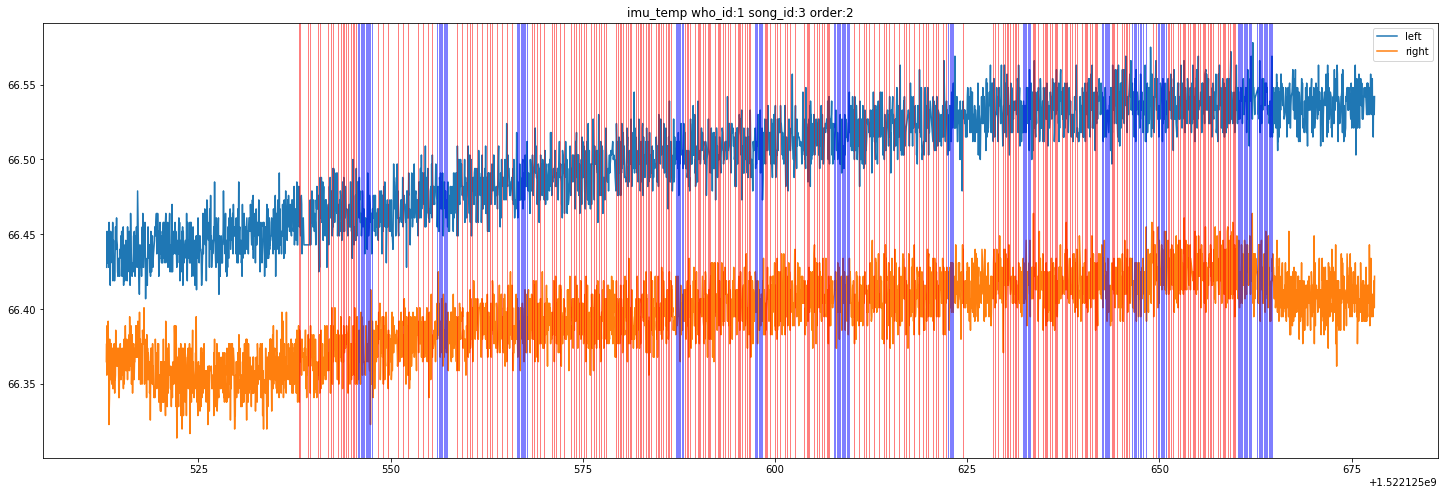

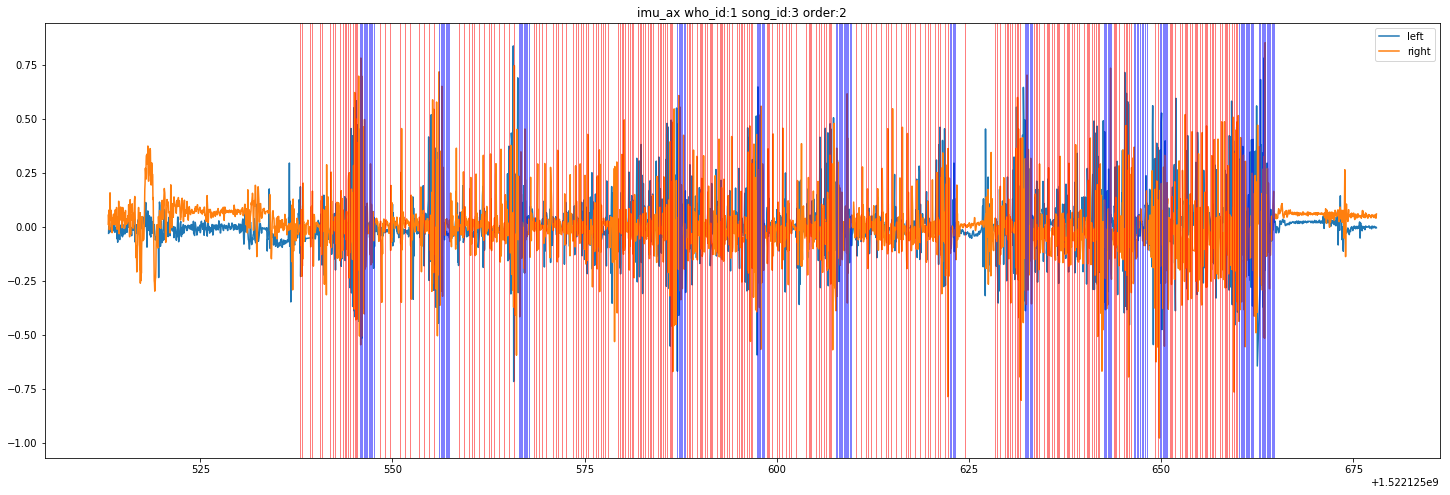

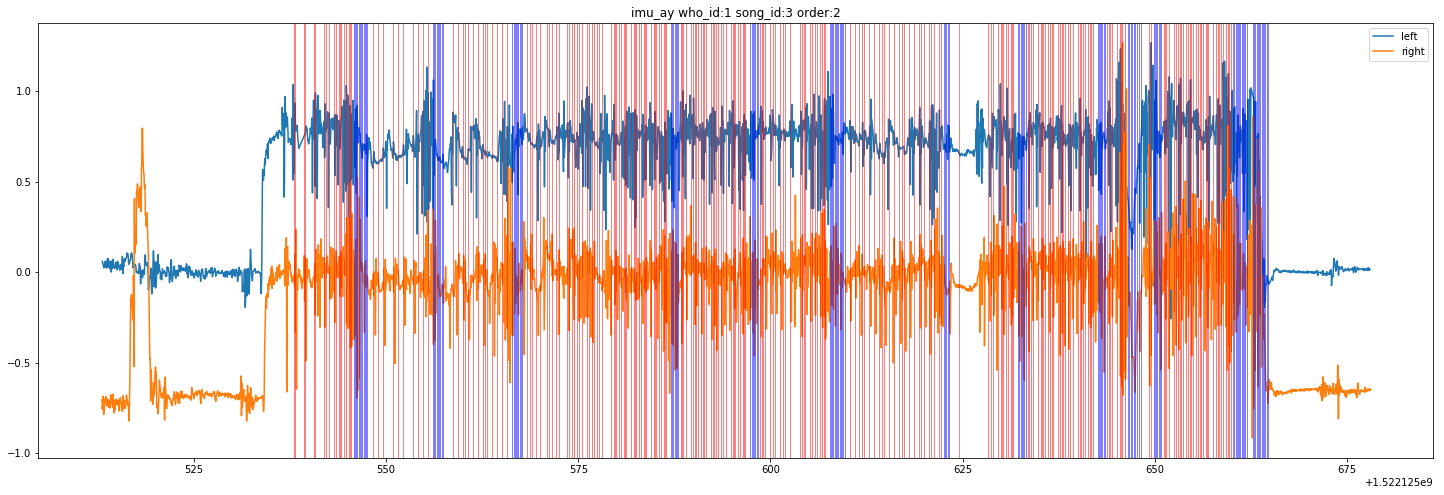

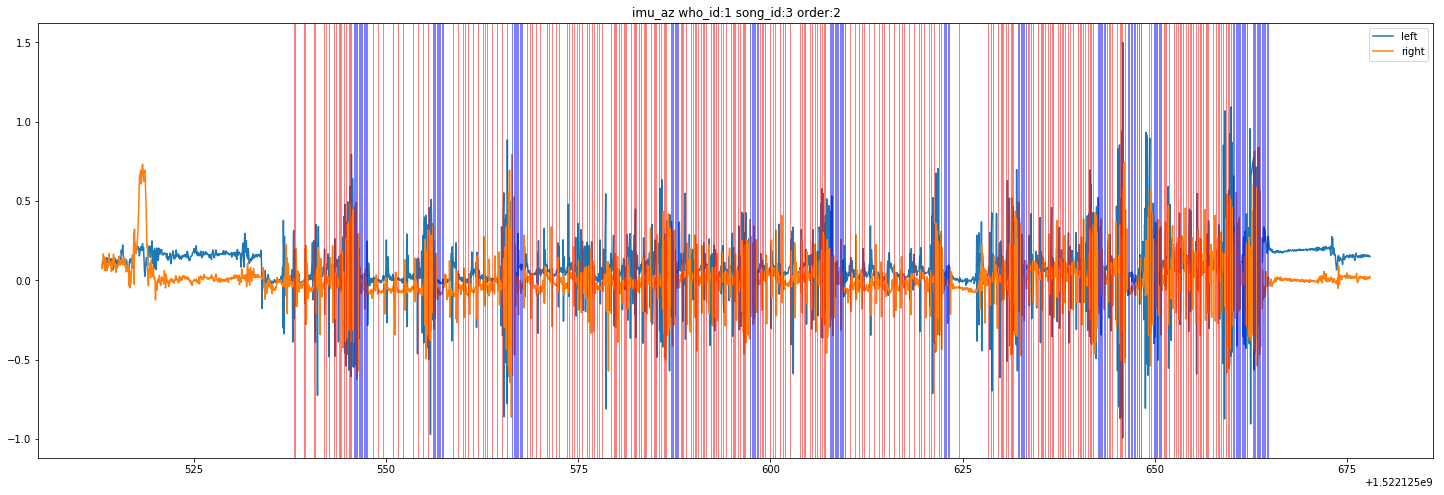

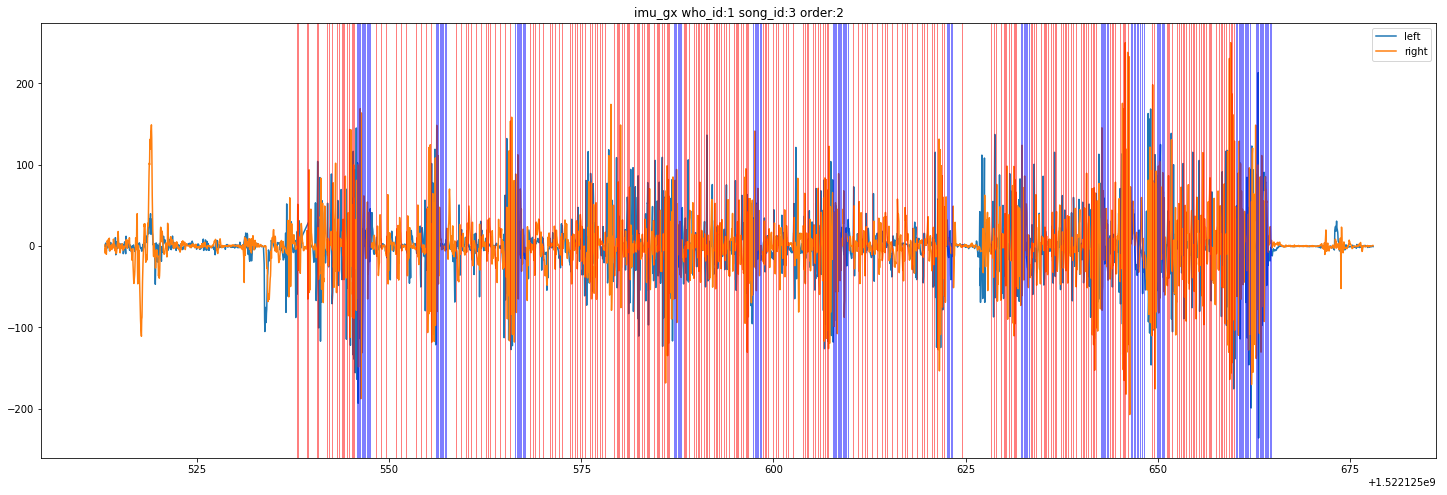

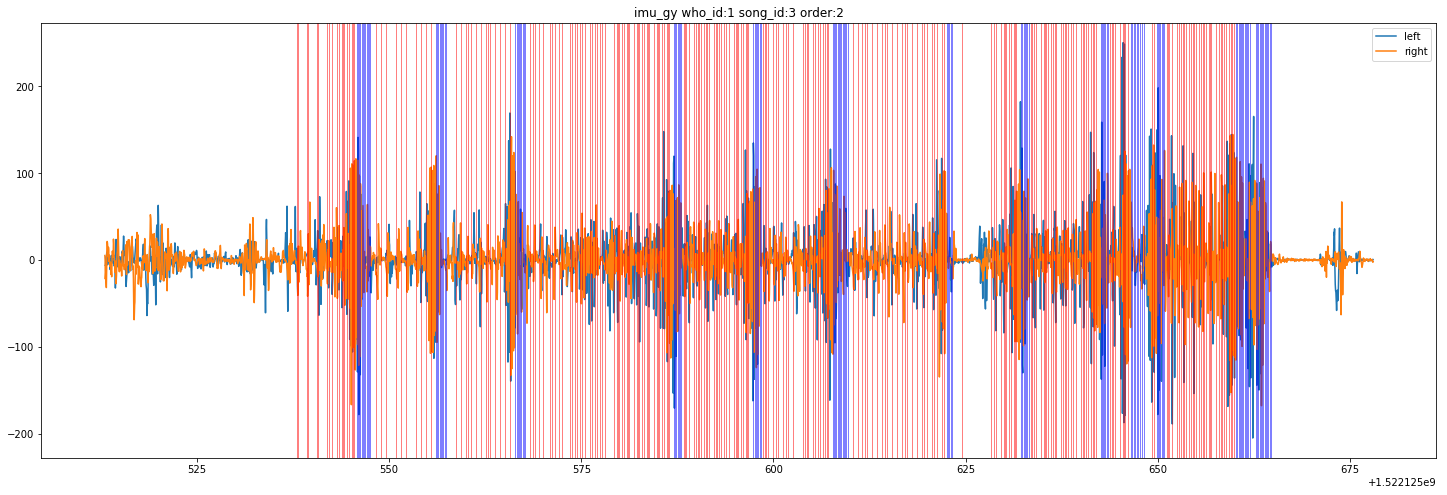

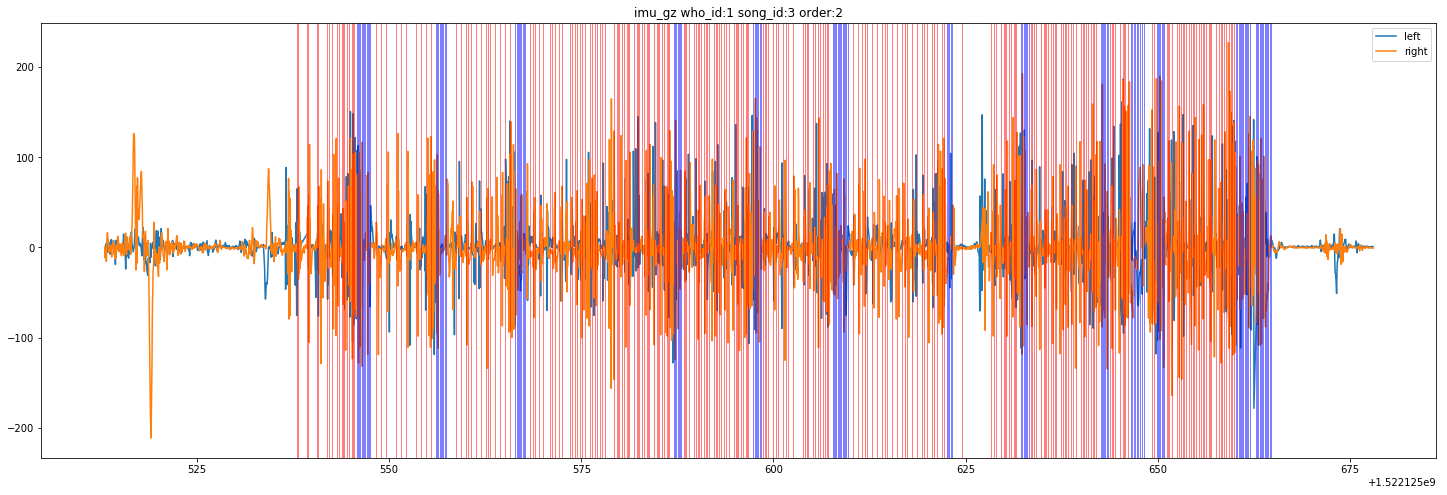

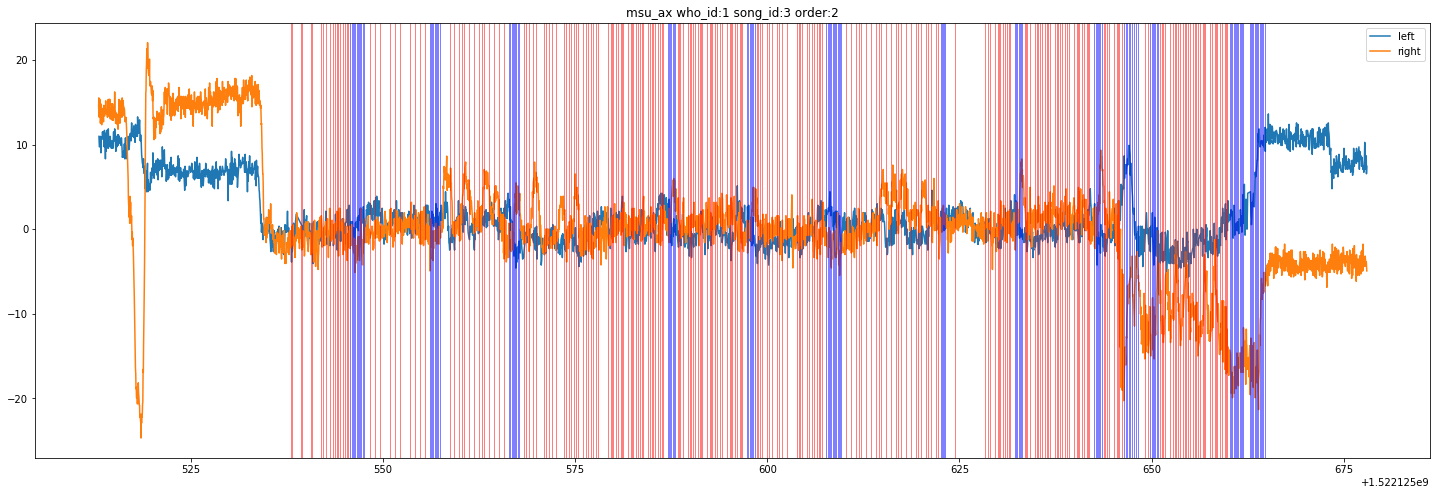

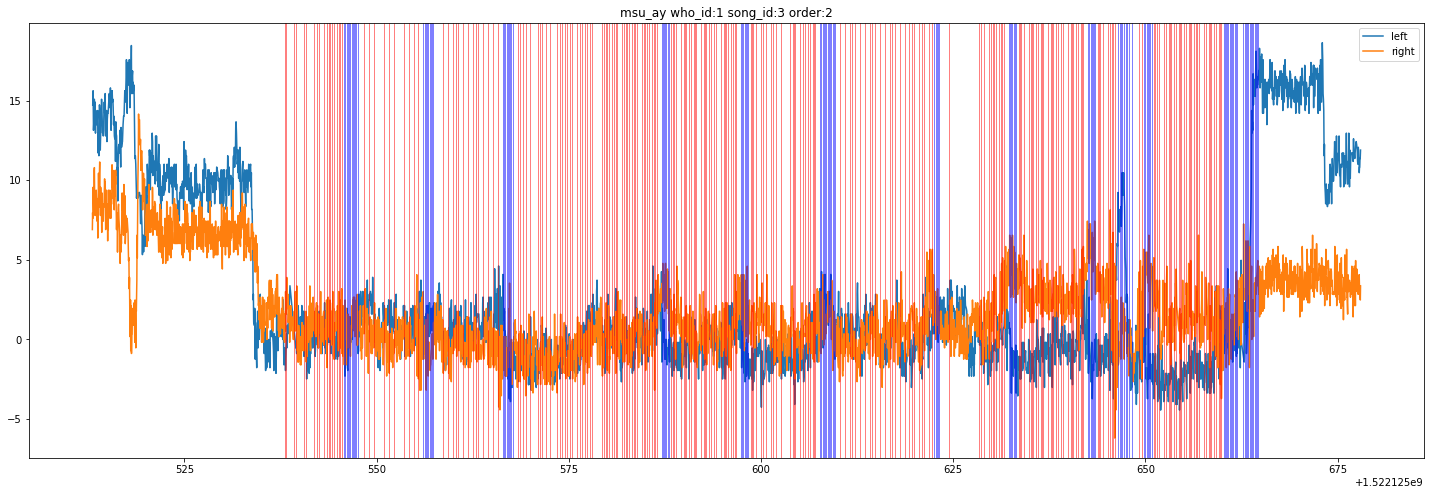

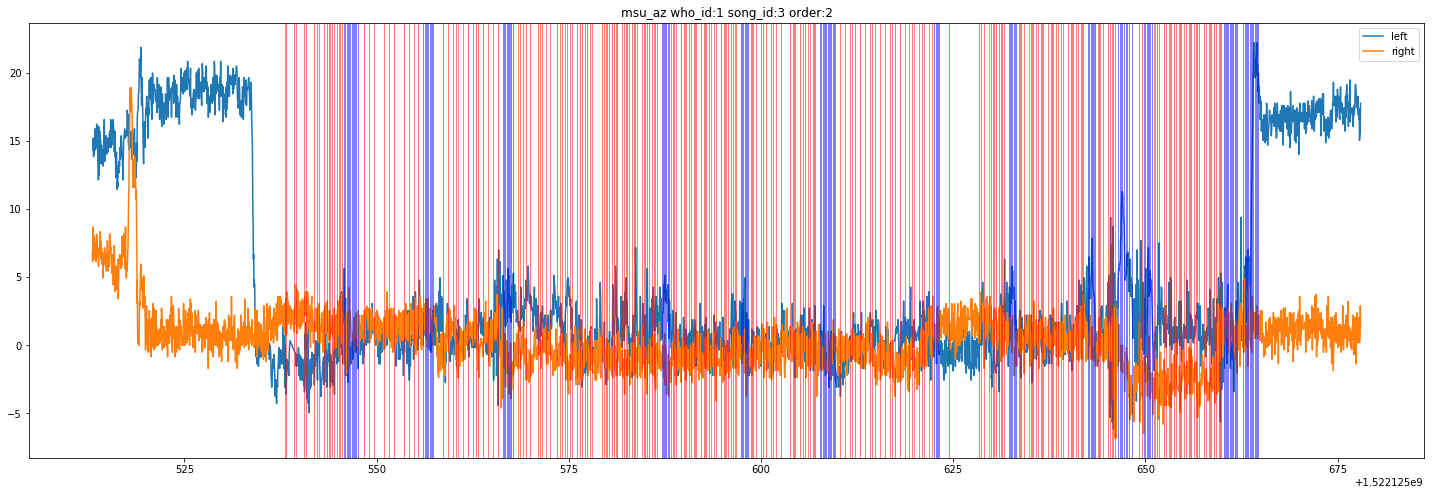

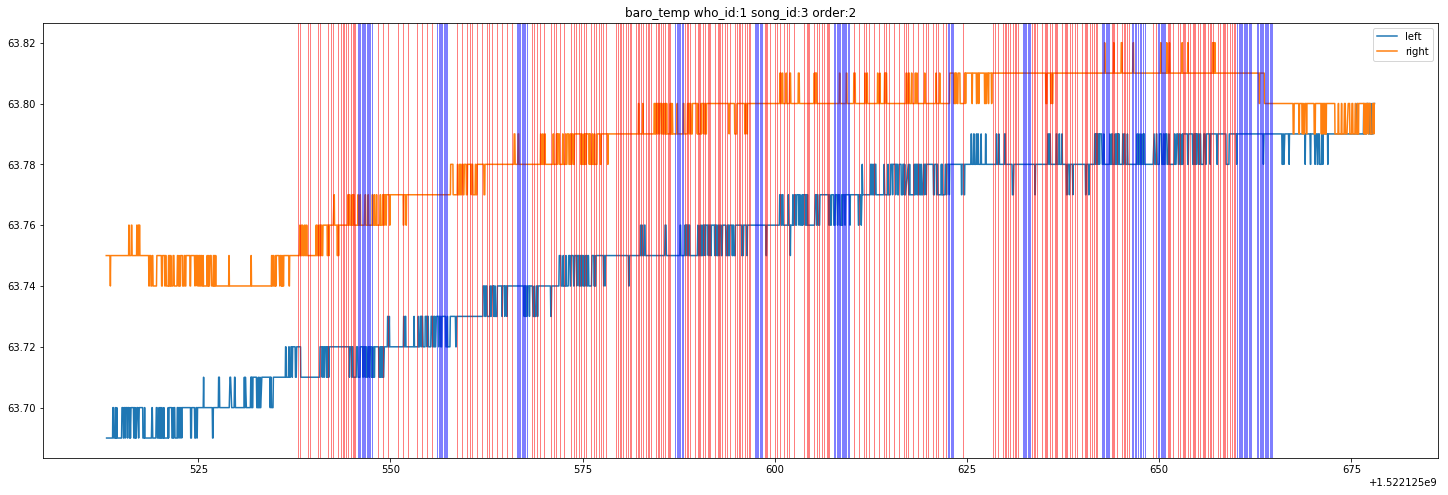

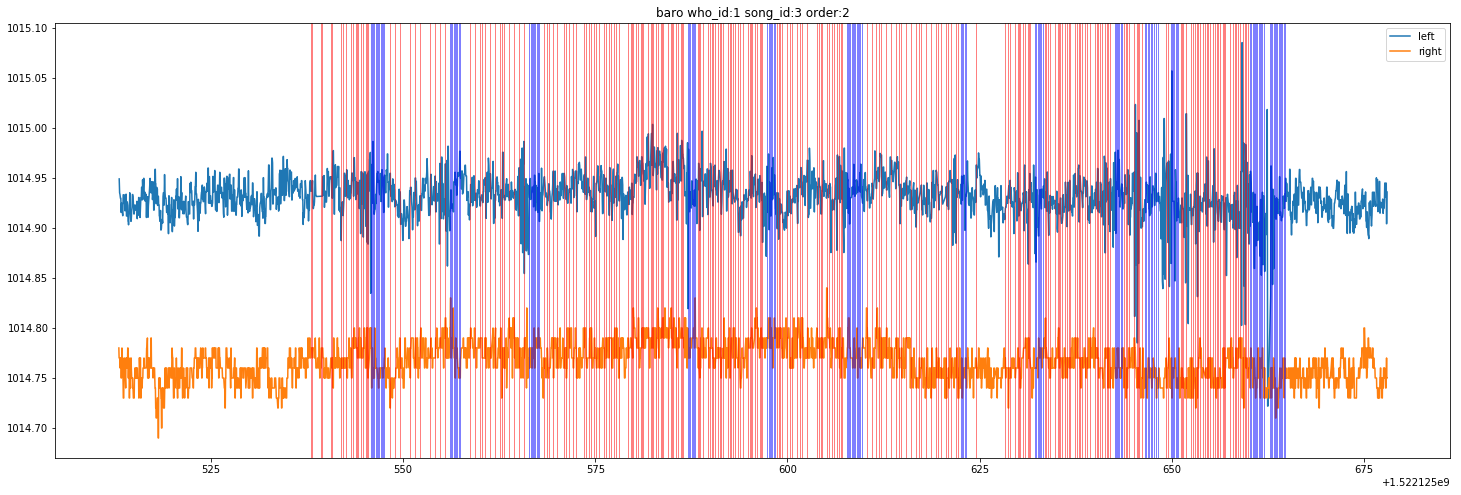

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.125441,4.901808e-05,0.175500,5.819608,0.353269,9.074500,0.015785,34.221105,0.125441,5.819608,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
1,0.140545,1.463966e-05,0.185500,7.013618,0.788450,10.098000,0.019768,49.979286,0.140545,7.013618,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000
2,0.137868,3.913835e-06,0.195500,4.121608,0.379975,5.478000,0.019012,17.367629,0.137868,4.121608,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000
3,0.143445,6.925703e-08,0.181500,3.748808,7.483005,5.614500,0.020577,21.536569,0.143445,3.748808,...,0.333333,0.333333,0.333333,0.666667,0.573198,-0.948300,-0.803627,0.998209,-0.299388,-0.355933
4,0.141131,3.642310e-05,0.210500,9.110418,1.321401,12.141500,0.019954,84.321119,0.141131,9.110418,...,0.333333,0.333333,0.333333,0.333333,-0.778082,0.919755,-0.469095,0.940120,-0.539829,-0.220591
5,0.130834,7.638247e-05,0.182667,8.444875,0.836947,12.517000,0.017194,72.152857,0.125782,7.952282,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000
6,0.129879,4.946977e-05,0.171000,4.009899,0.300669,5.382000,0.016918,16.379962,0.129879,4.009899,...,0.500000,0.500000,0.500000,0.500000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000
7,0.137805,7.277327e-06,0.180500,3.980954,1.045083,5.931500,0.018998,16.893081,0.137805,3.980954,...,0.666667,0.666667,0.333333,0.333333,0.872171,0.100950,-0.398657,0.427136,-0.275770,-0.986918
8,0.130691,3.212144e-05,0.182333,5.143702,4.338355,6.930333,0.017112,30.796026,0.131431,3.778376,...,0.500000,0.500000,0.500000,0.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000
9,0.142061,1.361283e-04,0.200667,5.311977,2.424330,7.789333,0.020317,30.641425,0.147868,4.708800,...,0.333333,0.333333,0.666667,0.333333,-0.904194,0.620949,-0.896258,-0.416287,0.764755,0.267481


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.55591369 -0.27022595  1.17301105 ...  1.14145101 -1.169301
  -0.94434153]
 [ 1.57435459 -0.26979646  1.18233851 ... -0.21516171 -0.78604993
   1.12324575]
 [ 1.61020475 -0.27135792  1.24452159 ...  1.14145101 -1.169301
  -0.94434153]
 ...
 [ 0.62491498 -0.26798291  0.5496257  ...  0.99717102 -1.16172464
  -0.85674127]
 [ 0.53184268 -0.26803254  0.46101482 ...  1.14145101 -1.169301
  -0.94434153]
 [ 0.51829782 -0.27130353  0.46723313 ...  1.07733172  0.8561591
   1.21474037]]


100%|██████████| 792/792 [01:22<00:00,  9.61it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:22<00:00,  9.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8996139  0.1003861 ]
 [0.78632479 0.21367521]]


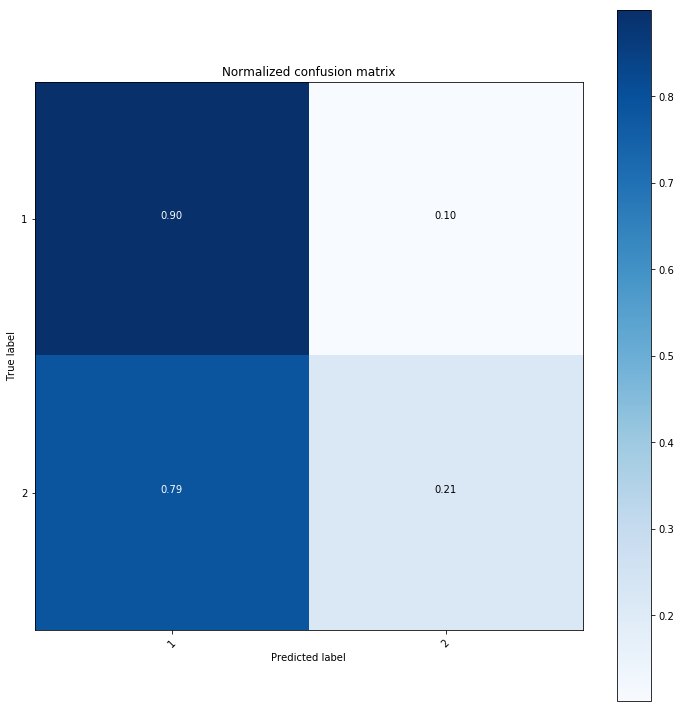

predicting 2 performance


100%|██████████| 792/792 [01:22<00:00,  9.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.29343629 0.70656371]
 [0.45299145 0.54700855]]


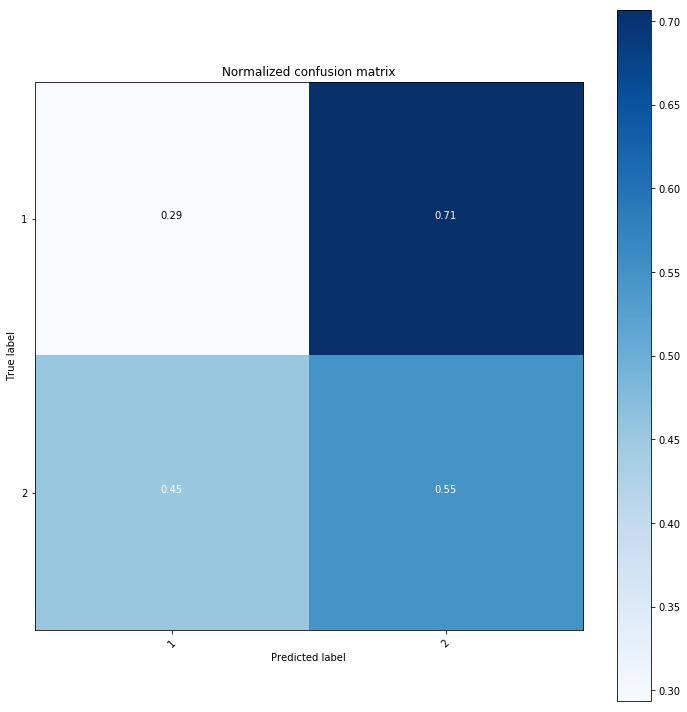

predicting 3 performance


100%|██████████| 792/792 [01:21<00:00,  9.77it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.25641026 0.74358974]]


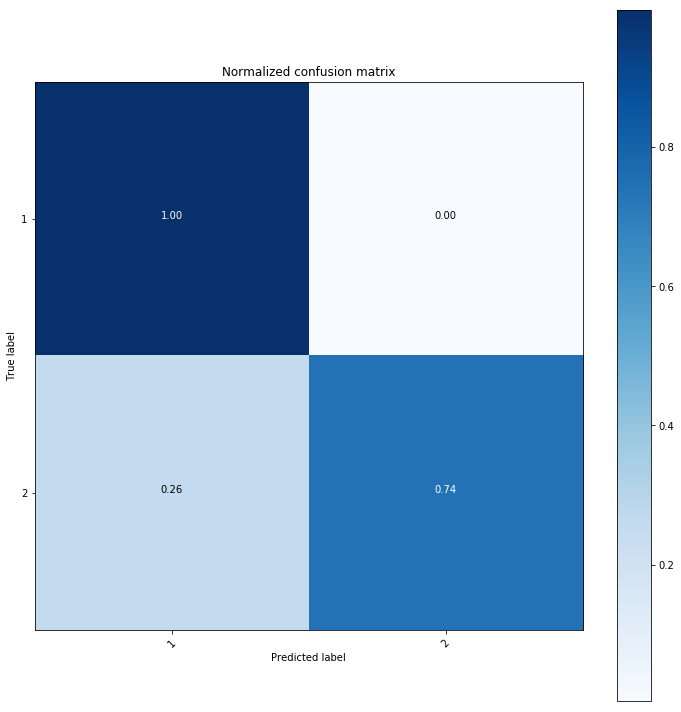

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[ 1.65480783 -0.17386406  1.71178843 ... -1.09699023 -0.86098523
   0.67358319]
 [ 1.70697749 -0.17422284  1.74146611 ...  0.95918201 -0.92587235
  -1.49433627]
 [ 1.64196318 -0.17406285  1.68835869 ... -0.61718008 -0.92196227
   0.11131845]
 ...
 [ 0.6568717  -0.1682676   0.50515664 ...  0.95918201 -0.92587235
  -1.49433627]
 [ 0.38910851 -0.16952368  0.27554515 ...  0.95918201 -0.92587235
  -1.49433627]
 [ 0.10312174 -0.08861634 -0.00873574 ...  0.95918201 -0.92587235
  -1.49433627]]


100%|██████████| 792/792 [01:16<00:00, 10.32it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:15<00:00, 10.56it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.53281853 0.46718147]
 [0.32478632 0.67521368]]


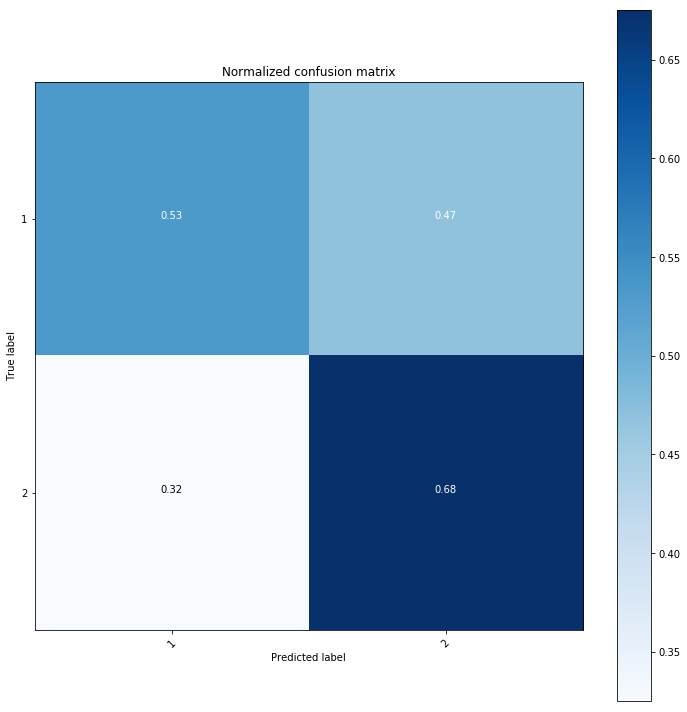

predicting 2 performance


100%|██████████| 792/792 [01:15<00:00, 10.43it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8957529 0.1042471]
 [0.8034188 0.1965812]]


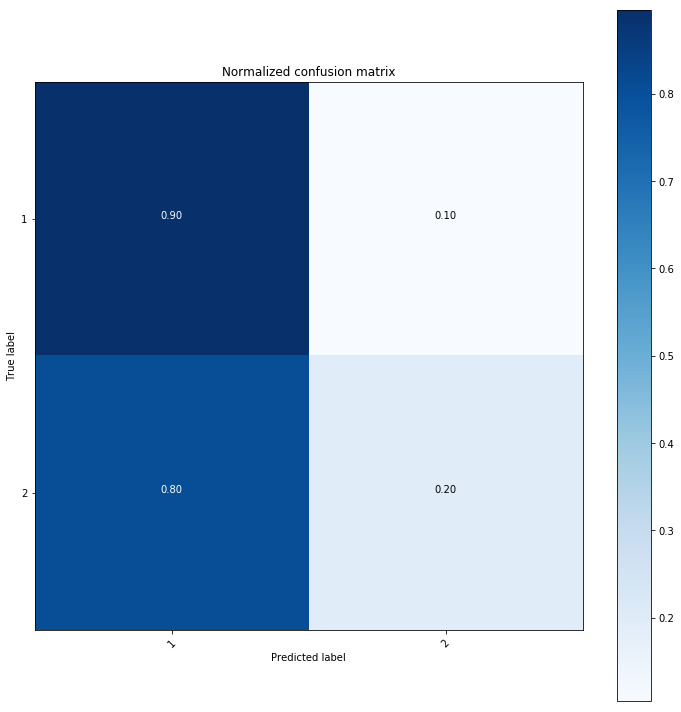

predicting 3 performance


100%|██████████| 792/792 [01:14<00:00, 10.63it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.43589744 0.56410256]]


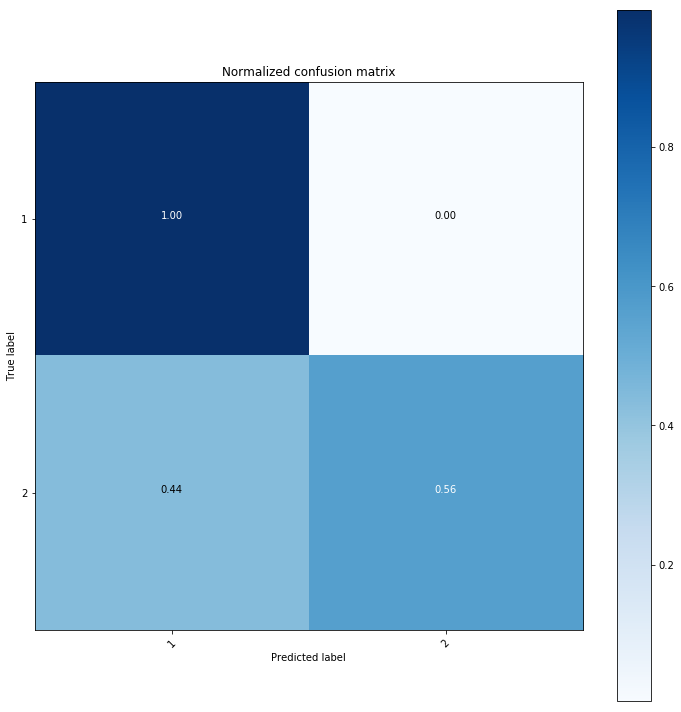

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 2.16892355 -0.27215575  2.18643411 ...  0.36287066 -0.94167462
  -1.12736595]
 [ 2.168382   -0.27217169  2.1852619  ... -0.96107071  0.88852876
  -1.2876597 ]
 [ 2.15977568 -0.27209107  2.17353976 ...  0.93959965 -1.09379755
  -0.71971066]
 ...
 [ 1.22247336 -0.27165263  0.96117821 ...  1.1195265  -1.21638495
  -1.2876597 ]
 [ 1.18055055 -0.25894555  1.01129032 ...  1.1195265   0.88852876
   0.84513005]
 [ 1.25637432 -0.2714927   1.02799436 ...  1.1195265   0.88852876
   0.84513005]]


100%|██████████| 792/792 [01:19<00:00,  9.98it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:18<00:00, 10.11it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.89189189 0.10810811]
 [0.79487179 0.20512821]]


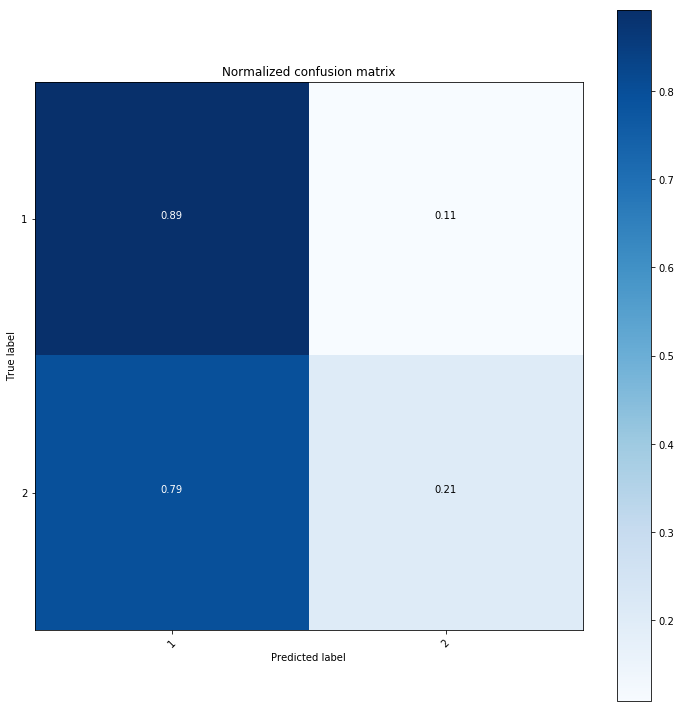

predicting 2 performance


100%|██████████| 792/792 [01:17<00:00, 10.18it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.83011583 0.16988417]
 [0.77777778 0.22222222]]


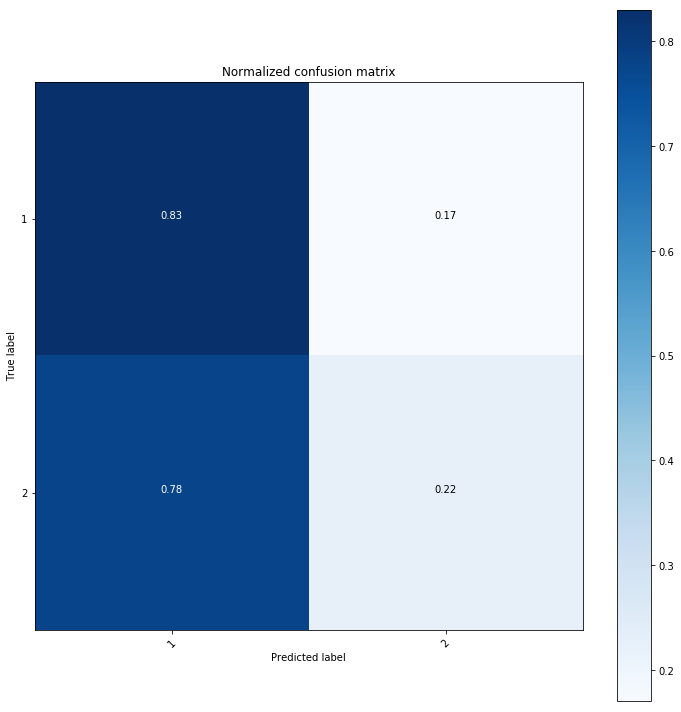

predicting 3 performance


100%|██████████| 792/792 [01:19<00:00,  9.99it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.20512821 0.79487179]]


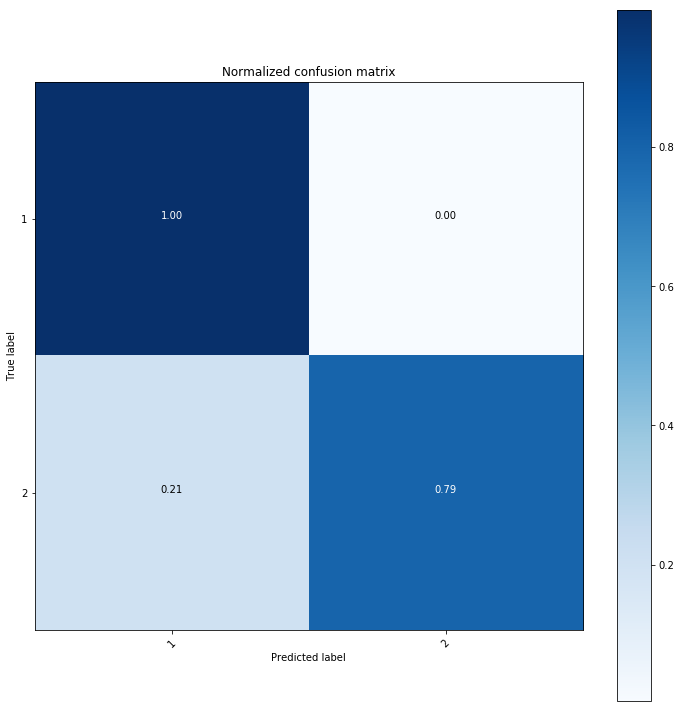

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-0.79102793 -0.34159114 -0.80981558 ... -1.12846215  0.77981891
  -1.30042678]
 [-0.69172836 -0.34770072 -0.68858626 ...  0.96433484  0.77981891
   0.83603647]
 [-0.52755137 -0.34893916 -0.55803161 ... -1.12846215  0.77981891
  -1.30042678]
 ...
 [ 0.19588357 -0.33008173  0.21907943 ...  0.96433484 -1.39093395
  -1.30042678]
 [ 1.07898144 -0.19035026  1.1868417  ...  0.96433484 -1.39093395
  -1.30042678]
 [ 1.69401033 -0.31461284  1.78055453 ... -0.59630253  0.46918171
  -1.25847975]]


100%|██████████| 792/792 [01:16<00:00, 10.31it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:16<00:00, 10.40it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8030888  0.1969112 ]
 [0.56410256 0.43589744]]


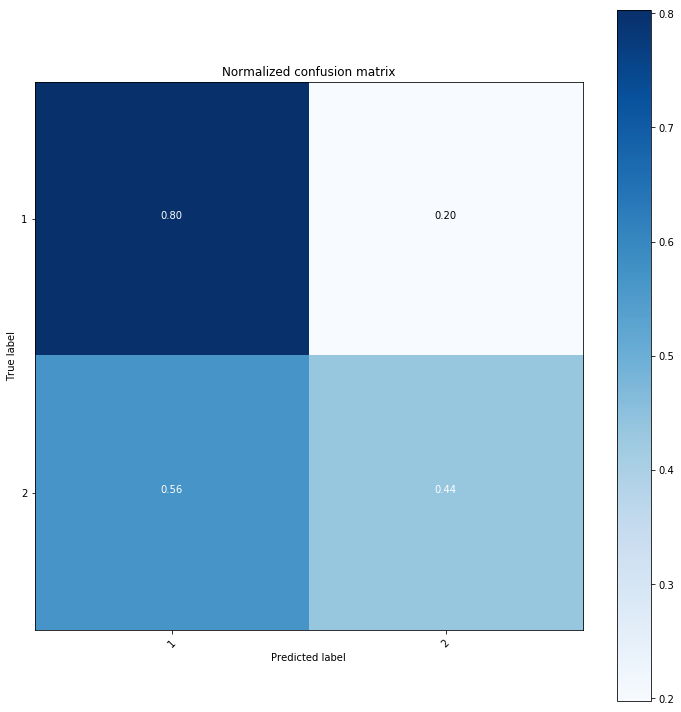

predicting 2 performance


100%|██████████| 792/792 [01:17<00:00, 10.26it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.75675676 0.24324324]
 [0.55555556 0.44444444]]


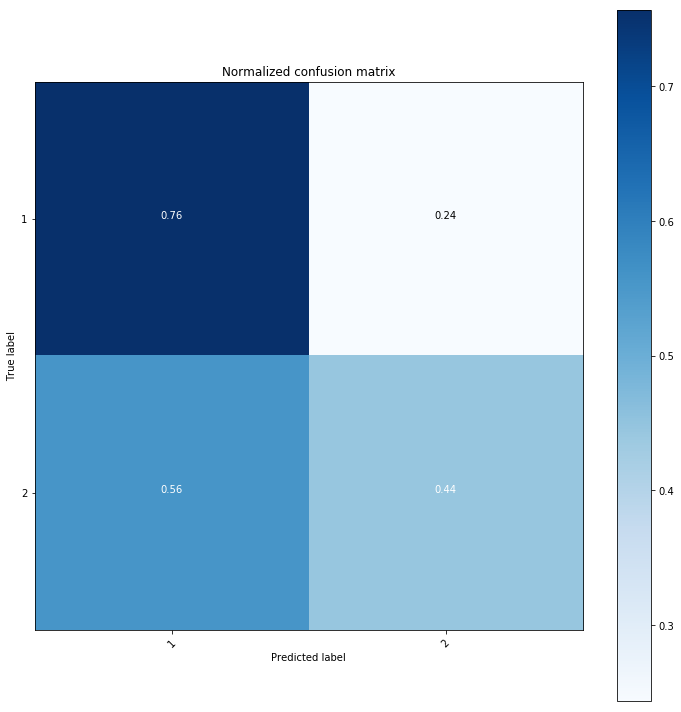

predicting 3 performance


100%|██████████| 792/792 [01:16<00:00, 10.31it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98455598 0.01544402]
 [0.27350427 0.72649573]]


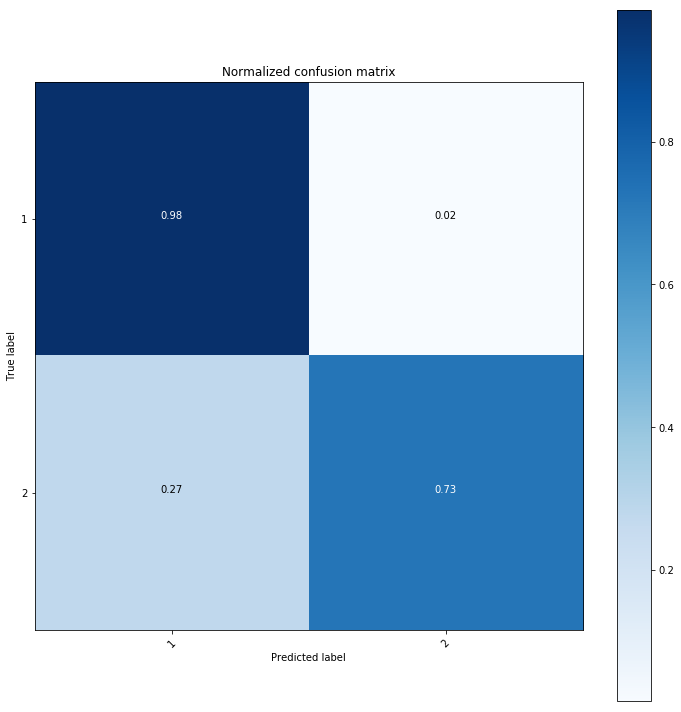

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.61585227 -0.34660118 -0.64787294 ... -0.8291292   1.02938921
  -1.2119388 ]
 [-0.60661337 -0.32165282 -0.6110954  ... -0.86653639  1.07823106
  -1.21284913]
 [-0.72634941 -0.29137813 -0.76739995 ...  1.03158447 -1.00610568
  -1.0504411 ]
 ...
 [-0.27807003 -0.33705622 -0.26170877 ...  1.27216041  1.07823106
   0.90146976]
 [ 0.12329064 -0.32588571  0.21456038 ... -0.86653639  1.07823106
  -1.21284913]
 [-0.48240694 -0.33368215 -0.47685738 ...  1.27216041  1.07823106
   0.90146976]]


100%|██████████| 792/792 [01:19<00:00,  9.99it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:18<00:00, 10.13it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.88803089 0.11196911]
 [0.76068376 0.23931624]]


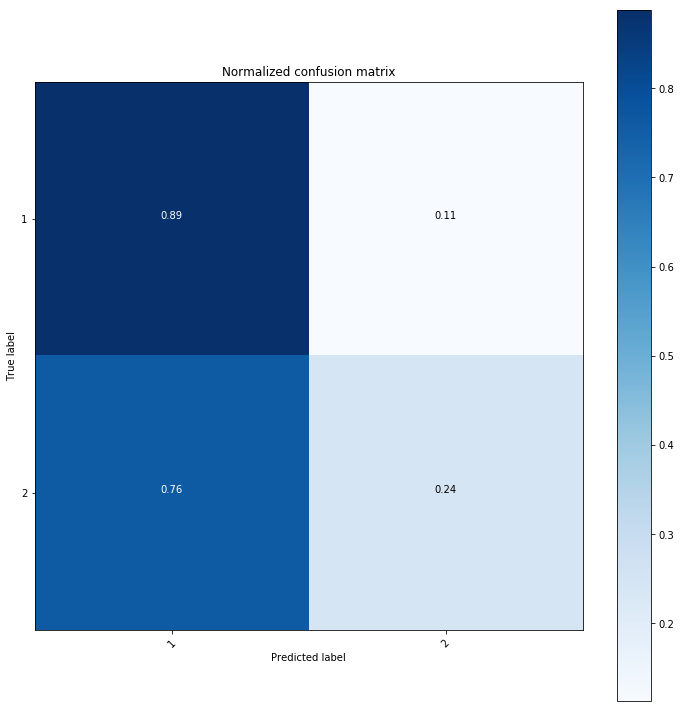

predicting 2 performance


100%|██████████| 792/792 [01:19<00:00, 10.02it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.87644788 0.12355212]
 [0.71794872 0.28205128]]


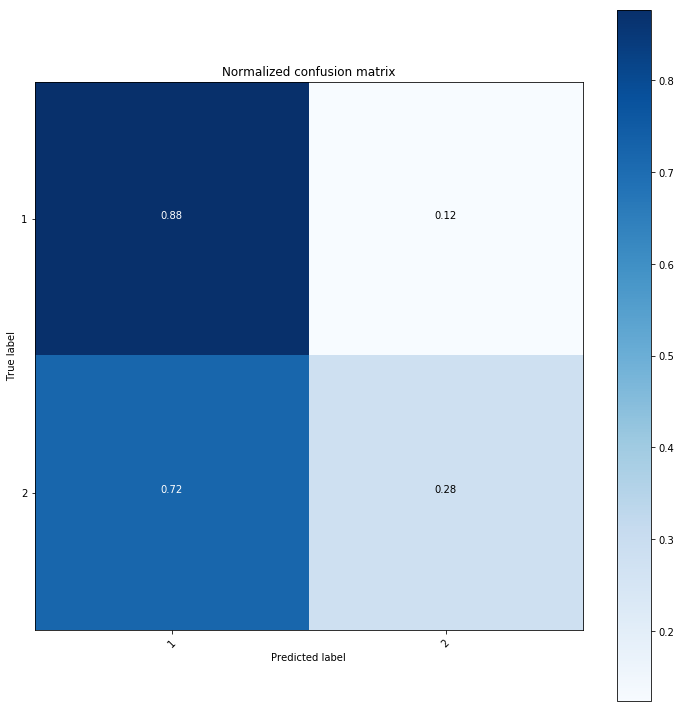

predicting 3 performance


100%|██████████| 792/792 [01:19<00:00, 10.00it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99227799 0.00772201]
 [0.18803419 0.81196581]]


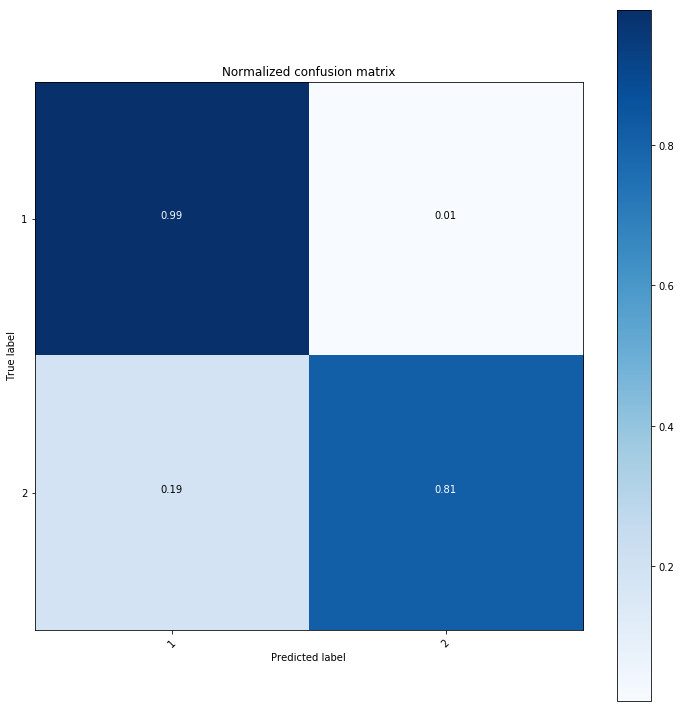

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[-0.32627367 -0.29695766 -0.27554757 ... -0.92712495 -0.95059564
   0.75569644]
 [ 0.03351104 -0.2427163   0.03415149 ...  1.02183021 -1.09347583
  -1.44658861]
 [ 0.01705507 -0.28650344  0.11092563 ...  0.57446486  0.20841725
   0.68261423]
 ...
 [ 0.05326332 -0.29612677  0.18769977 ... -1.06833025 -1.09347583
   0.75569855]
 [ 0.16924415 -0.29220285  0.30481286 ... -1.06833025  1.00617258
  -1.44658861]
 [ 0.00693694 -0.29561653  0.10767249 ...  1.02183021  1.00617258
   0.75569855]]


100%|██████████| 792/792 [01:15<00:00, 10.42it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:15<00:00, 10.55it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.86486486 0.13513514]
 [0.78632479 0.21367521]]


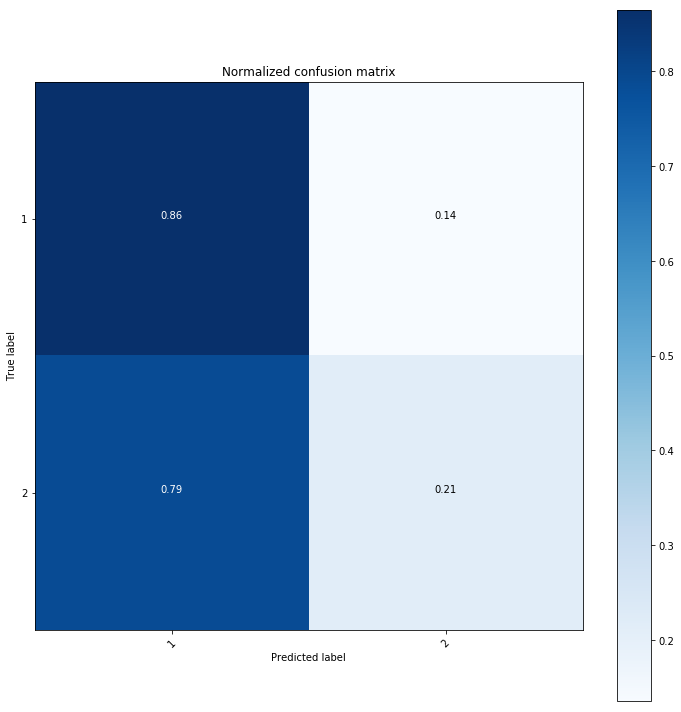

predicting 2 performance


100%|██████████| 792/792 [01:14<00:00, 10.62it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.81081081 0.18918919]
 [0.76068376 0.23931624]]


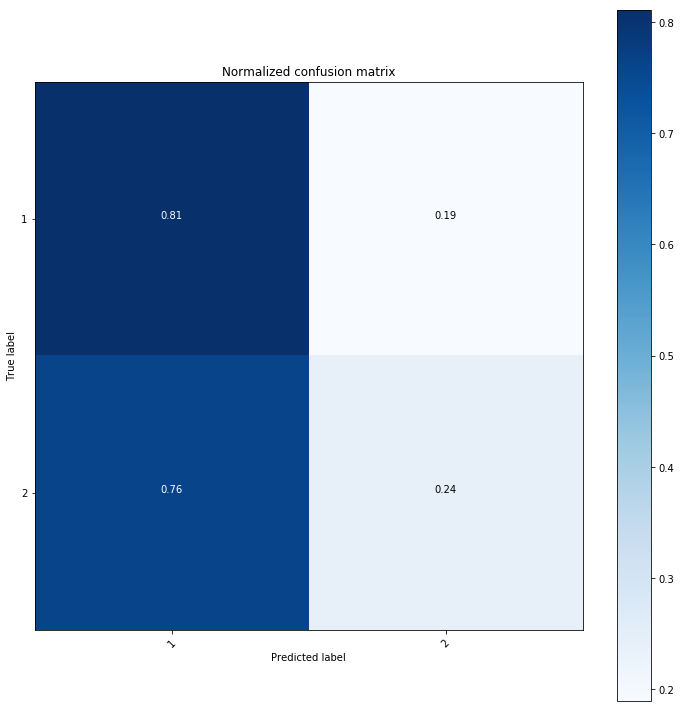

predicting 3 performance


100%|██████████| 792/792 [01:15<00:00, 10.51it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97683398 0.02316602]
 [0.11965812 0.88034188]]


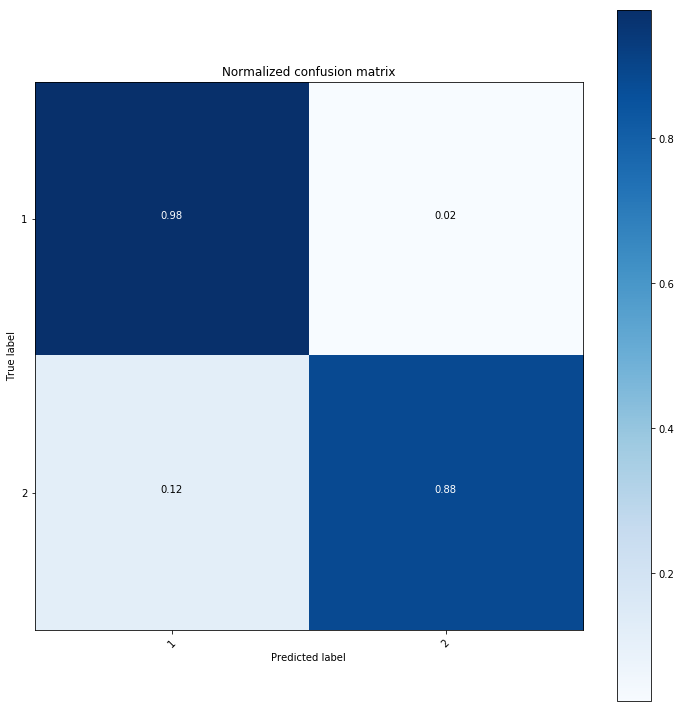

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[-0.04344432 -0.37897791 -0.2862842  ... -0.90253244 -1.06657782
   0.79696393]
 [-0.03553669 -0.37824873 -0.32735571 ... -0.90253244 -1.06657782
   0.79696393]
 [-0.23173636 -0.37901093 -0.44635779 ...  1.18533109  1.00152259
   0.79696393]
 ...
 [-0.52239831 -0.37868628 -0.48848242 ... -0.90253244 -1.06657782
   0.79696393]
 [-0.37250936 -0.37896066 -0.26416876 ...  1.18533109 -1.06657782
  -1.33186376]
 [-0.47095691 -0.37805472 -0.37685215 ... -0.90253244  1.00152259
  -1.33186376]]


100%|██████████| 792/792 [01:15<00:00, 10.49it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:14<00:00, 10.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8030888 0.1969112]
 [0.8974359 0.1025641]]


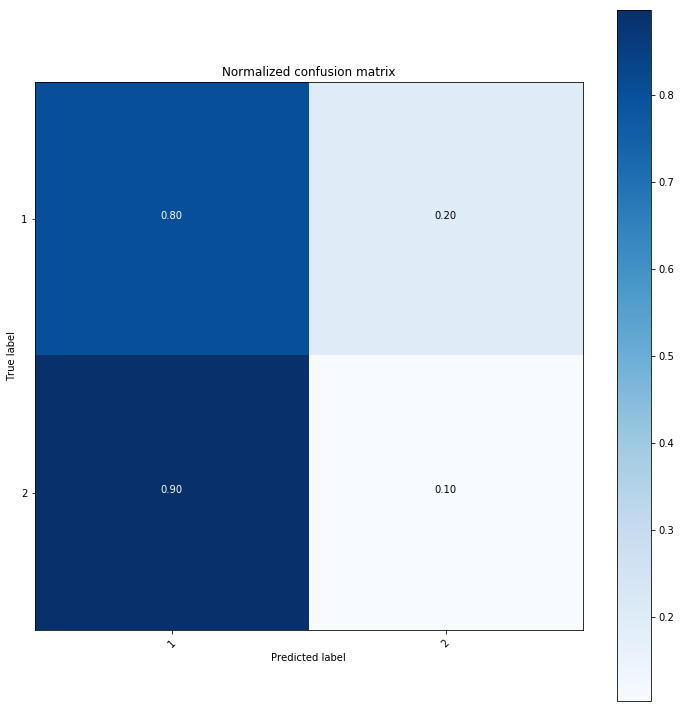

predicting 2 performance


100%|██████████| 792/792 [01:15<00:00, 10.46it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8030888 0.1969112]
 [0.7008547 0.2991453]]


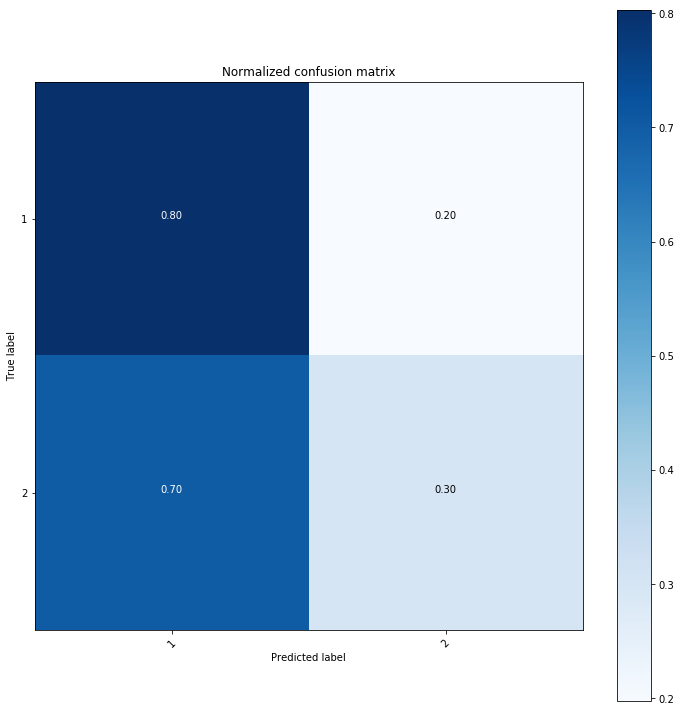

predicting 3 performance


100%|██████████| 792/792 [01:15<00:00, 10.50it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99227799 0.00772201]
 [0.16239316 0.83760684]]


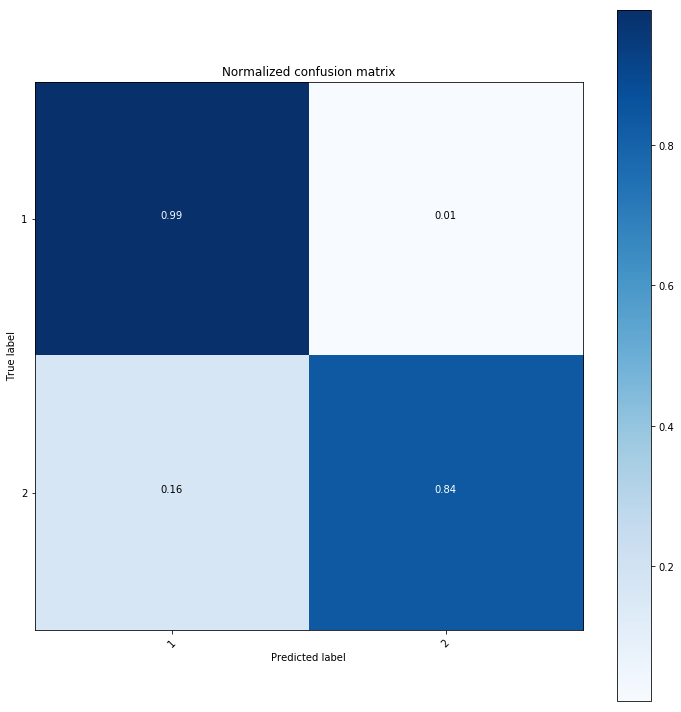

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[-0.28996435 -0.1895426  -0.32313993 ...  1.09707558  0.76349144
   0.4209029 ]
 [-0.12145158 -0.15841574 -0.21765477 ... -0.15138864 -0.98877647
   0.36738084]
 [-0.246553   -0.18306186 -0.2164423  ... -0.94032715 -1.0083201
   0.96695474]
 ...
 [ 3.06507929 -0.19062943  3.26699287 ... -0.94032715 -1.0083201
   0.96695474]
 [ 3.09005001 -0.189902    3.33125394 ... -0.94032715 -1.0083201
   0.96695474]
 [ 2.98945622 -0.17782311  3.19666943 ...  1.14114221 -1.0083201
  -1.11816686]]


100%|██████████| 792/792 [01:14<00:00, 10.62it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:14<00:00, 10.68it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.09266409 0.90733591]
 [0.22222222 0.77777778]]


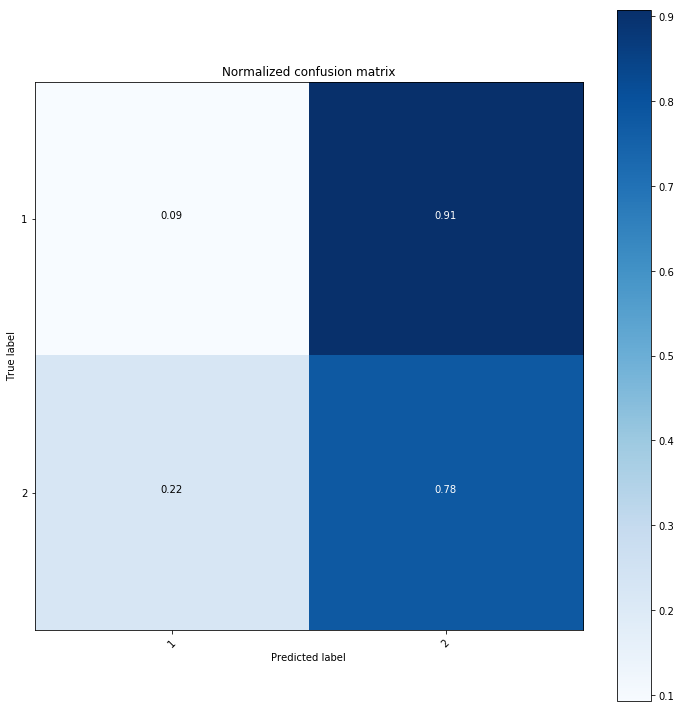

predicting 2 performance


100%|██████████| 792/792 [01:13<00:00, 10.72it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91119691 0.08880309]
 [0.86324786 0.13675214]]


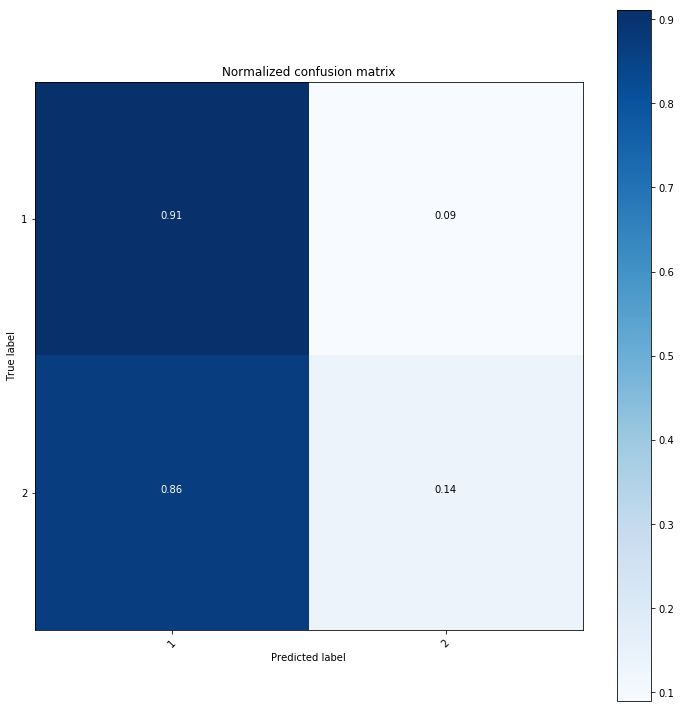

predicting 3 performance


100%|██████████| 792/792 [01:14<00:00, 10.62it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98455598 0.01544402]
 [0.26495726 0.73504274]]


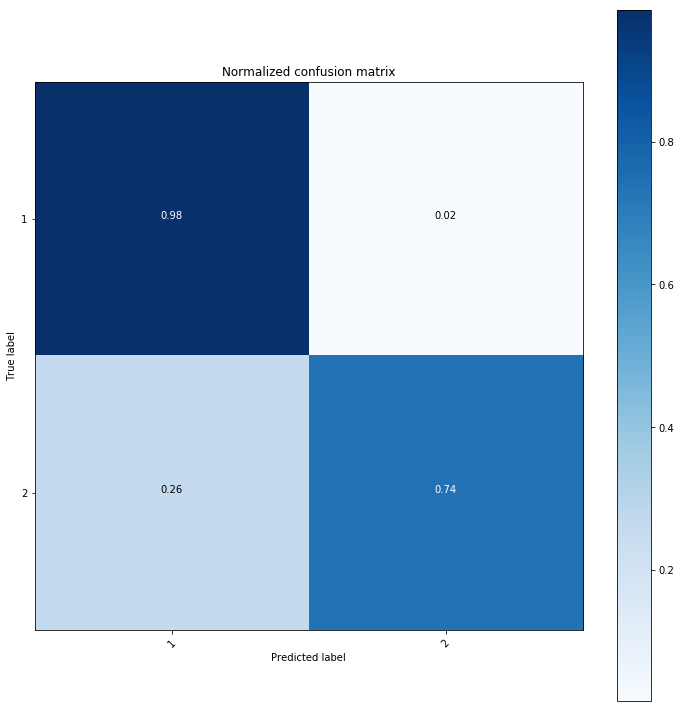

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)